# Generation of steady state dose response heatmaps for A375 and IPC298 cell lines

This script generates steady state dose response heatmaps for combinations of RAF (belvarafenib) and MEK inhibitors (cobimetinib) for simulated both A375 (NRAS<sup>Q61</sup>) and IPC298 (BRAF<sup>V600E</sup>)

## Import of libraries
Importing libraries necessary to generate bliss heatmaps.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from synergy.combination import Bliss
import numpy as np
import os
from pathlib import Path
plt.rcParams.update({'font.size': 15})
#import synergy package 
from synergy.combination import Bliss

Changes to main file directory. This works provided the "main_dir" has the correct directory name and the cwd starts within the main file directory. This might require tweaking under some high performance computing setups.

In [2]:
main_dir = "panRAFi_MEKi_combo"
for i in Path().resolve().parents:
    if i.parts[-1] == main_dir:
        os.chdir(i)
from scripts.custom_functions.Plot_utility import generate_heatmap_pixel_map
from scripts.custom_functions.Plot_utility import signif

## Generate heatmaps

In [212]:
#Loads csv files as dataframe
IPC298_well_results_path = Path("data/Experimental_dose_response/IPC298_ Well results total pERK per well.txt")
IPC298_well_results_df = pd.read_csv(IPC298_well_results_path,delimiter='\t',header=7)

A375_well_results_path = Path("data/Experimental_dose_response/A375_Well results total pERK per well.txt")
A375_well_results_df = pd.read_csv(A375_well_results_path,delimiter='\t',header=7)

In [244]:
IPC298_well_results_mat = IPC298_well_results_df.pivot(columns='Column', index='Row',values='Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well').to_numpy()
print(IPC298_well_results_mat[1:7,:6])
#IPC298_well_results_mat = IPC298_well_results_mat[1:7,6:]
IPC298_well_results_mat = np.rot90(IPC298_well_results_mat[1:7,:6],k=-1)
print(IPC298_well_results_mat)
#IPC298_well_results_mat = np.flip(np.transpose(IPC298_well_results_mat[1:6,0:5]),axis = 1)

[[ 370.63677114  362.75638755  360.51771217  395.17987044  444.76725824
   556.10276745]
 [ 344.78725703  379.48781575  380.91655723  460.88197846  663.20029471
   903.08662034]
 [ 357.14249353  372.93190302  412.87275365  597.79687733 1014.96590693
  1751.49019812]
 [ 344.93671553  362.65111716  469.86224424  853.01004483 2025.70312433
  2831.95476962]
 [ 353.99821603  405.20219788  621.02289132 1726.36877036 3120.58954713
  4217.52361661]
 [ 365.3440976   430.88766183  609.91800981 1402.72730146 1969.59177014
  2386.96834217]]
[[ 365.3440976   353.99821603  344.93671553  357.14249353  344.78725703
   370.63677114]
 [ 430.88766183  405.20219788  362.65111716  372.93190302  379.48781575
   362.75638755]
 [ 609.91800981  621.02289132  469.86224424  412.87275365  380.91655723
   360.51771217]
 [1402.72730146 1726.36877036  853.01004483  597.79687733  460.88197846
   395.17987044]
 [1969.59177014 3120.58954713 2025.70312433 1014.96590693  663.20029471
   444.76725824]
 [2386.96834217 4217

In [264]:
#IPC298_well_results_mat = np.transpose(np.flip(IPC298_well_results_mat[1:6,0:5],axis=1))
A375_well_results_mat = A375_well_results_df.pivot(columns='Column', index='Row',values='Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well').to_numpy()
#A375_well_results_mat = np.flip(np.transpose(A375_well_results_mat[1:6,0:5]),axis=1)
print(A375_well_results_mat[1:7,:6])
A375_well_results_mat = np.rot90(A375_well_results_mat[1:7,:6],k=-1)
#A375_well_results_mat = A375_well_results_mat[1:7,:6]
print(A375_well_results_mat)
#A375_well_results_mat = A375_well_results_mat[1:6,6:]

[[ 311.22238057  306.48121268  309.93610207  303.98932462  351.28224924
   340.66579358]
 [ 304.54771324  303.49587843  322.34267692  330.65105271  323.02359846
   348.62894878]
 [ 303.23804915  299.35389482  328.72086539  323.40320381  357.42402346
   536.27791738]
 [ 300.03833561  293.31769267  311.39906875  325.22535381  506.92490034
   921.12289822]
 [ 294.63238806  321.7754387   322.77783869  341.75174465  592.21480328
  1275.73142671]
 [ 309.50059613  325.12113255  348.08308661  351.70945163  653.49367808
  1257.8851019 ]]
[[ 309.50059613  294.63238806  300.03833561  303.23804915  304.54771324
   311.22238057]
 [ 325.12113255  321.7754387   293.31769267  299.35389482  303.49587843
   306.48121268]
 [ 348.08308661  322.77783869  311.39906875  328.72086539  322.34267692
   309.93610207]
 [ 351.70945163  341.75174465  325.22535381  323.40320381  330.65105271
   303.98932462]
 [ 653.49367808  592.21480328  506.92490034  357.42402346  323.02359846
   351.28224924]
 [1257.8851019  1275

In [265]:
IPC298_well_results_mat

array([[ 365.3440976 ,  353.99821603,  344.93671553,  357.14249353,
         344.78725703,  370.63677114],
       [ 430.88766183,  405.20219788,  362.65111716,  372.93190302,
         379.48781575,  362.75638755],
       [ 609.91800981,  621.02289132,  469.86224424,  412.87275365,
         380.91655723,  360.51771217],
       [1402.72730146, 1726.36877036,  853.01004483,  597.79687733,
         460.88197846,  395.17987044],
       [1969.59177014, 3120.58954713, 2025.70312433, 1014.96590693,
         663.20029471,  444.76725824],
       [2386.96834217, 4217.52361661, 2831.95476962, 1751.49019812,
         903.08662034,  556.10276745]])

In [266]:
A375_well_results_mat[-1,0]

1257.8851019

In [267]:
IPC298_well_results_df

,Row,Column,Plane,Timepoint,Nuclei - Number of Objects,Nuclei - Intensity Cell Alexa 647 Mean - Mean per Well,Number of Analyzed Fields,Height [µm],Time [s],Compound,Concentration,Cell Type,Cell Count,Unnamed: 13
0,1,1,1,0,476,1982.408874,20,0,0,NaN,NaN,NaN,NaN,NaN
1,1,2,1,0,648,1937.177629,20,0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,1,0,637,2118.538400,20,0,0,NaN,NaN,NaN,NaN,NaN
3,1,4,1,0,695,2134.152617,20,0,0,NaN,NaN,NaN,NaN,NaN
4,1,5,1,0,814,2153.420368,20,0,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,8,8,1,0,562,2185.814812,20,0,0,NaN,NaN,NaN,NaN,NaN
92,8,9,1,0,677,2138.834968,20,0,0,NaN,NaN,NaN,NaN,NaN
93,8,10,1,0,682,1998.510794,20,0,0,NaN,NaN,NaN,NaN,NaN
94,8,11,1,0,646,2045.217473,20,0,0,NaN,NaN,NaN,NaN,NaN


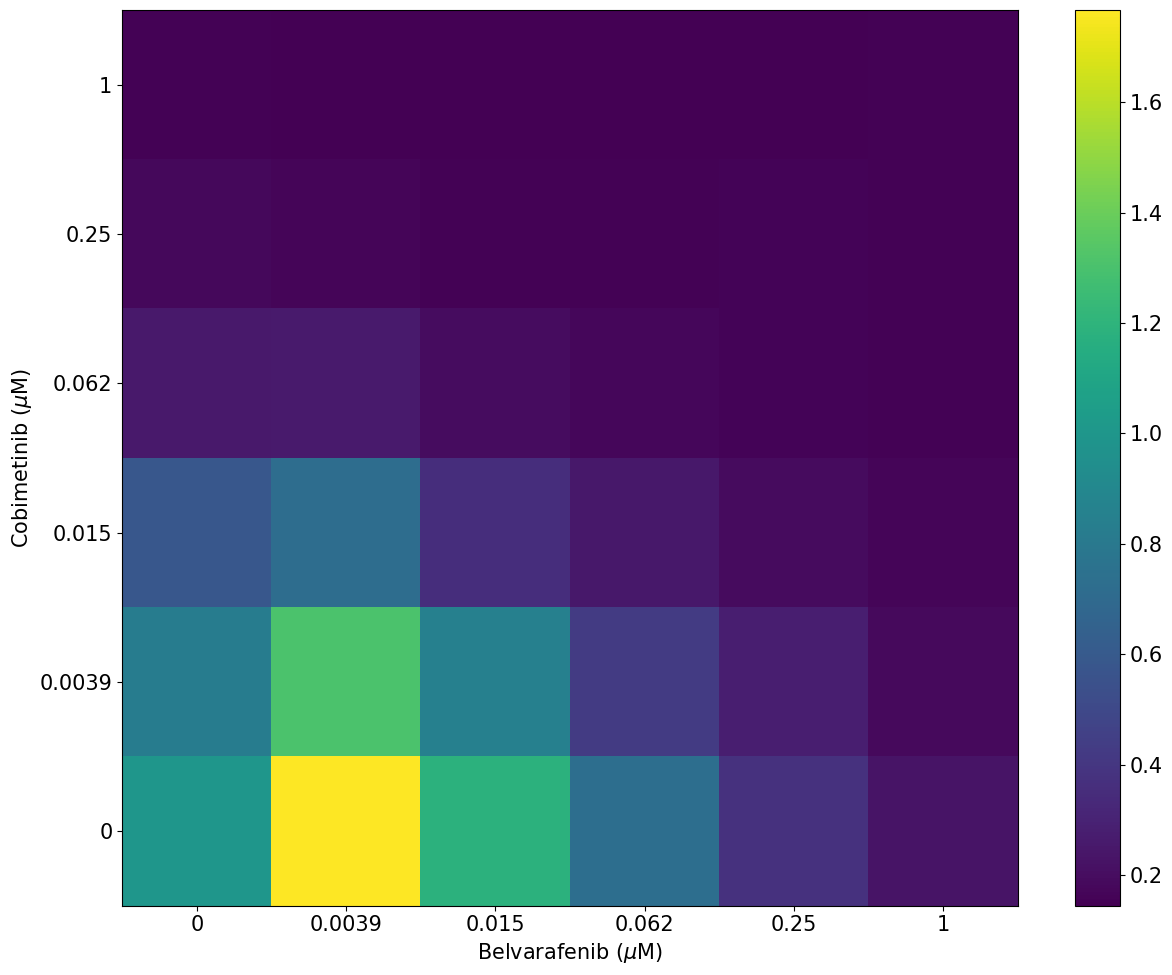

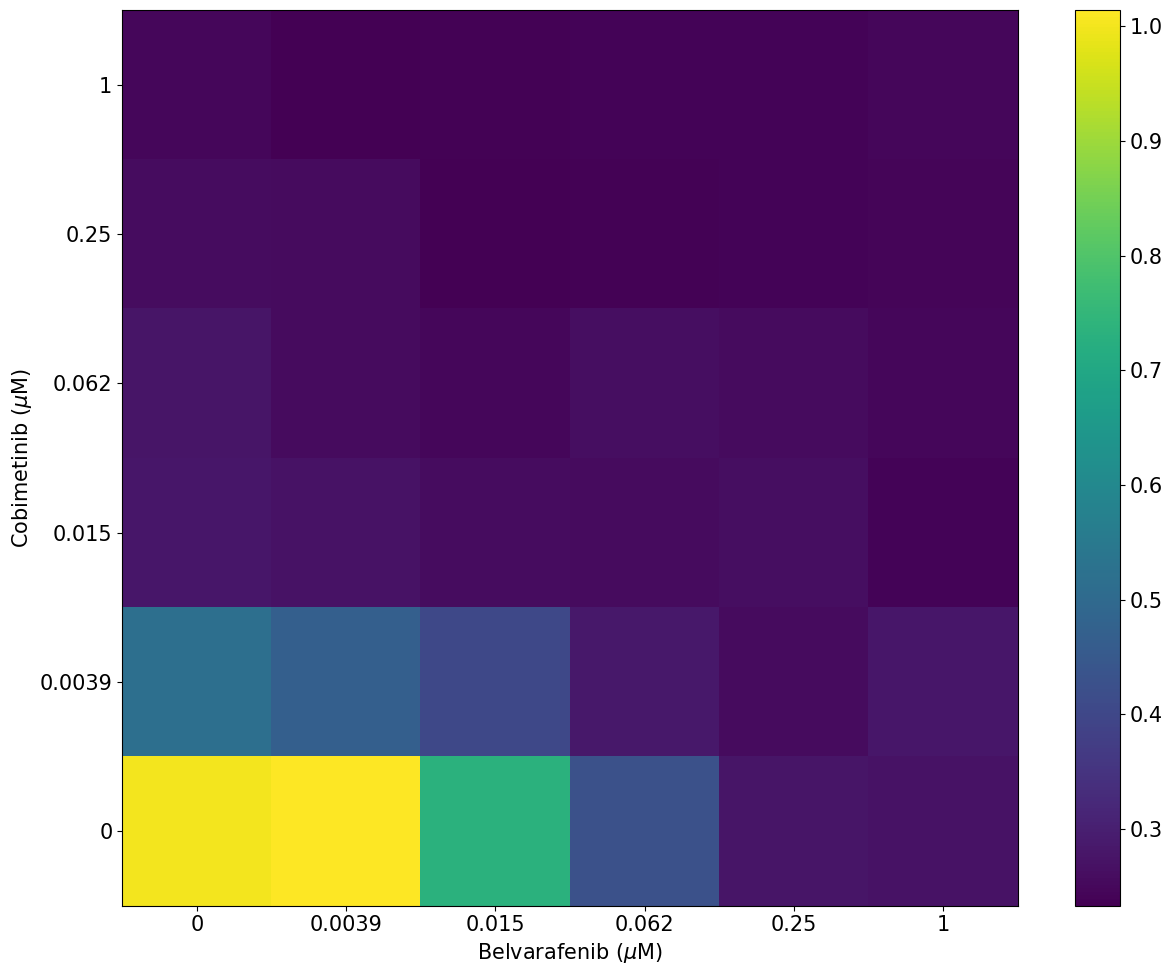

In [277]:
fig_IPC298, ax_IPC298 = plt.subplots(1, 1,figsize=(15,10))
fig_A375, ax_A375 = plt.subplots(1, 1,figsize=(15,10))
#print(A375_well_results_mat[0,0])
A375_mat = A375_well_results_mat/A375_well_results_mat[-1,0]

im=ax_A375.imshow(A375_mat, extent=[0, 1, 0, 1],vmax = np.max(A375_mat))
fig_A375.colorbar(im, ax=ax_A375, fraction=0.046, pad=0.04)
n_col = np.shape(A375_well_results_mat)[1]
x_loc = np.linspace(1/n_col/2,1-1/n_col/2,n_col)

#belva_doses = [0,0.002,0.008,0.03,0.13,0.5]
#cobi_doses = [0,0.002,0.008,0.03,0.13,0.5]
belva_doses = [0,0.0039,0.015,0.062,0.25,1]
cobi_doses = [0,0.0039,0.015,0.062,0.25,1]

n_row = np.shape(A375_well_results_mat)[0]
y_loc = np.linspace(1/n_row/2,1-1/n_row/2,n_row)
ax_A375.set_xticks(ticks = x_loc,labels = belva_doses)
ax_A375.set_yticks(ticks = y_loc,labels = cobi_doses)
#ax_n_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
#if (i==len(params)-1):    
ax_A375.set_xlabel('Belvarafenib ($\mu$M)')
#if (j==0):    
ax_A375.set_ylabel('Cobimetinib ($\mu$M)')
IPC298_mat = IPC298_well_results_mat/IPC298_well_results_mat[-1,0]
im=ax_IPC298.imshow(IPC298_mat, extent=[0, 1, 0, 1],vmax = np.max(IPC298_mat))
fig_IPC298.colorbar(im, ax=ax_IPC298, fraction=0.046, pad=0.04)
#ax_IPC298.set_xticks(ticks = x_loc,labels = np.round(x_loc,3))
ax_IPC298.set_xticks(ticks = x_loc,labels = belva_doses)
ax_IPC298.set_yticks(ticks = y_loc,labels = cobi_doses)
#ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
#if (i==len(params)-1):    
ax_IPC298.set_xlabel('Belvarafenib ($\mu$M)')
#if (j==0):    
ax_IPC298.set_ylabel('Cobimetinib ($\mu$M)')
fig_A375.subplots_adjust(wspace=0, hspace=0)
fig_A375.tight_layout()
fig_A375.savefig(Path(f"figures/Experimental_dose_response/Belva_Cobi_A375.svg"),format='svg')
fig_IPC298.subplots_adjust(wspace=0, hspace=0)
fig_IPC298.tight_layout()
fig_IPC298.savefig(Path(f"figures/Experimental_dose_response/Belva_Cobi_fig_IPC298.svg"),format='svg')

NameError: name 'dr_df_IPC298' is not defined

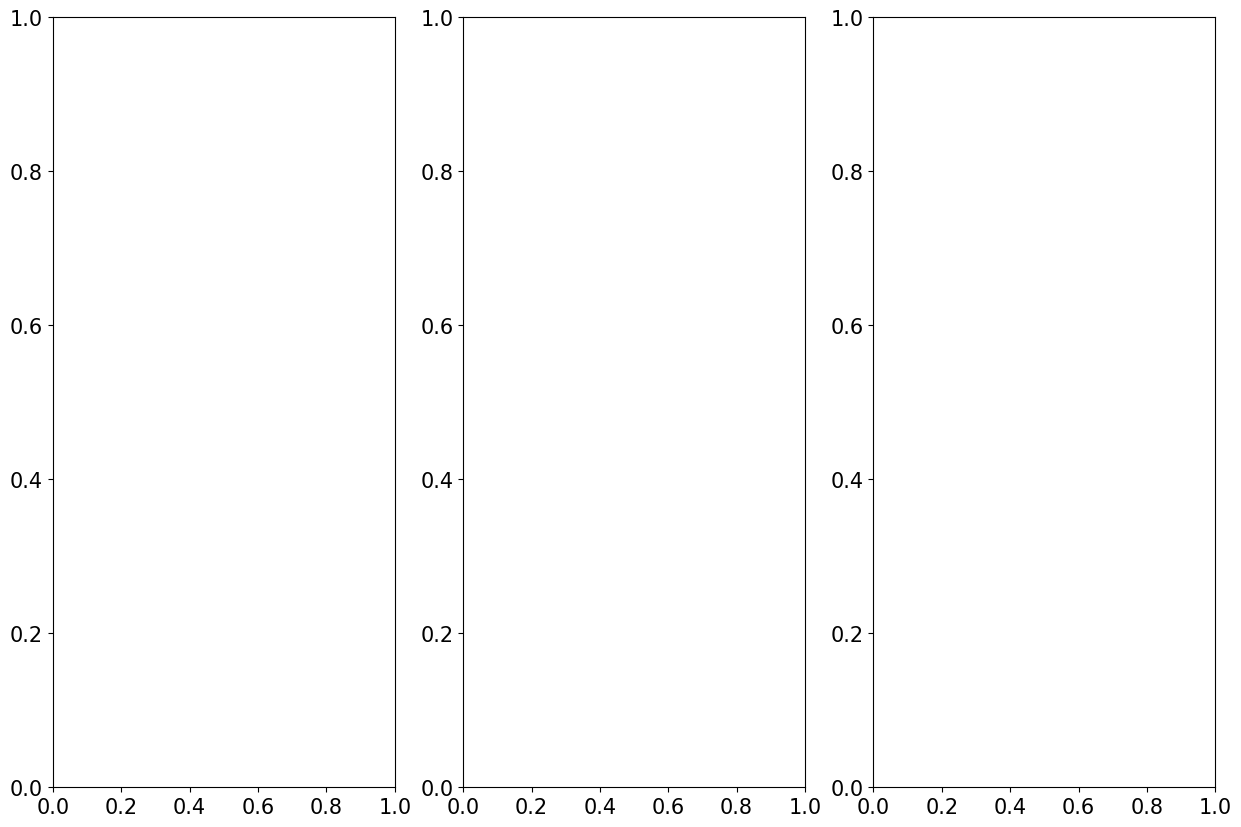

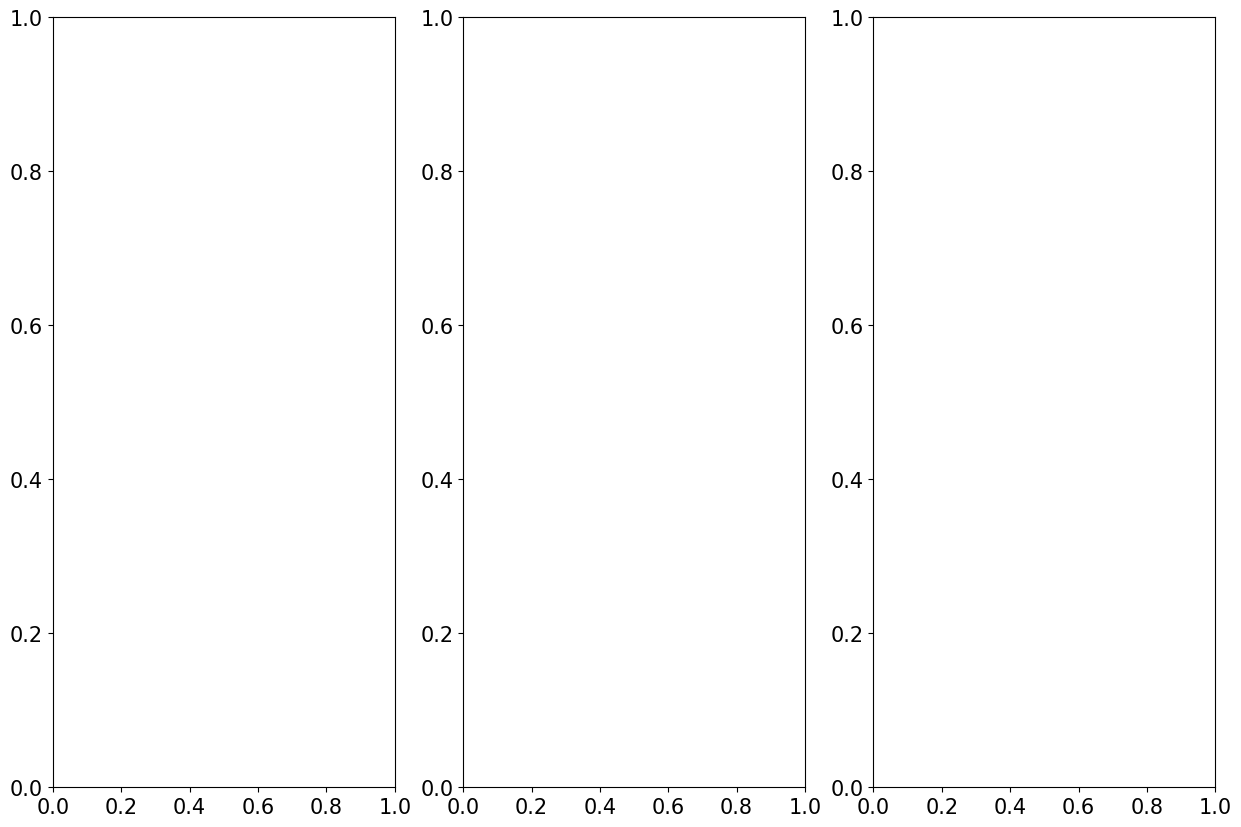

In [23]:
# extract drugless condition
zero_dose_IPC298_df = IPC298_well_results_df.iloc[0]
zero_dose_A375_df = A375_well_results_df.iloc[0]

#compare synergies among set of cooperative parameters
fig_IPC298, ax_IPC298 = plt.subplots(1, 3,figsize=(15,10))
fig_A375, ax_A375 = plt.subplots(1, 3,figsize=(15,10))
plt_titles=['Model simulations', 'Bliss null model',  'Bliss excess'];


#print(params[i])
#create and fit the Bliss models
bliss_IPC298 = Bliss()
bliss_A375 = Bliss()
D1_IPC298=IPC298_well_results_df["Column"].to_numpy();
D2_IPC298=IPC298_well_results_df["Row"].to_numpy(); 

#w = A375
D1_A375=A375_well_results_df["Column"].to_numpy();
D2_A375=A375_well_results_df["Row"].to_numpy(); 

bliss_IPC298.fit(D1_IPC298,D2_IPC298, IPC298_well_results_df[]/zero_dose_IPC298_df[params[i]]);
bliss_A375.fit(D1_A375,D2_A375, A375_well_results_df[/zero_dose_A375_df[params[i]]);

In [ ]:
#reshape E_sim to matrix
dr_df_mat_n_CRAF = dr_df_n_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
matrix_n_CRAF = dr_df_mat_n_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
matrix_n_CRAF = matrix_n_CRAF/zero_dose_n_CRAF_df[params[i]]

dr_df_mat_w_CRAF = dr_df_w_CRAF.set_index(["RAFi_0_uM","MEKi_0_uM"])
matrix_w_CRAF = dr_df_mat_w_CRAF[[params[i]]].pivot_table(index = "RAFi_0_uM",columns = "MEKi_0_uM",values = params[i]).to_numpy()
matrix_w_CRAF = matrix_w_CRAF/zero_dose_w_CRAF_df[params[i]]

#extract bliss reference and bliss excess
E_mat_bliss_ref_n_CRAF=np.rot90(bliss_n_CRAF.reference.reshape(np.shape(matrix_n_CRAF)));
E_mat_bliss_syn_n_CRAF=np.rot90(bliss_n_CRAF.synergy.reshape(np.shape(matrix_n_CRAF)));
matrix_n_CRAF = np.rot90(matrix_n_CRAF)

E_mat_bliss_ref_w_CRAF=np.rot90(bliss_w_CRAF.reference.reshape(np.shape(matrix_w_CRAF)));
E_mat_bliss_syn_w_CRAF=np.rot90(bliss_w_CRAF.synergy.reshape(np.shape(matrix_w_CRAF)));
matrix_w_CRAF = np.rot90(matrix_w_CRAF)


max_simulation = np.max(np.concatenate((matrix_n_CRAF,matrix_w_CRAF)))
max_excess = np.max(np.concatenate((E_mat_bliss_ref_n_CRAF,E_mat_bliss_ref_w_CRAF)))
max_syn = np.max(np.concatenate((E_mat_bliss_syn_w_CRAF,E_mat_bliss_syn_w_CRAF)))
condition_max = [max_simulation,max_excess,max_syn]

Es_n_CRAF=[matrix_n_CRAF, E_mat_bliss_ref_n_CRAF, E_mat_bliss_syn_n_CRAF];
Es_w_CRAF=[matrix_w_CRAF, E_mat_bliss_ref_w_CRAF, E_mat_bliss_syn_w_CRAF];

xvals = np.log10(np.sort(np.unique(np.array(dr_df_mat_w_CRAF.index.get_level_values('RAFi_0_uM').tolist()))))
x_transform = generate_heatmap_pixel_map(xvals)
log_x_vals_to_mark = np.linspace(-2.25,0.5, 5);
x_loc = x_transform[0]*log_x_vals_to_mark+x_transform[1]
x_labels = signif(10**log_x_vals_to_mark,1)
yvals = np.log10(np.sort(np.unique(np.array(dr_df_mat_w_CRAF.index.get_level_values('MEKi_0_uM').tolist()))))
y_transform = generate_heatmap_pixel_map(yvals)
log_y_vals_to_mark = np.linspace(-2.75,0, 5);
y_loc = y_transform[0]*log_y_vals_to_mark+y_transform[1]
y_labels = signif(10**log_y_vals_to_mark,1)

for j in range(len(plt_titles)):
    im=ax_n_CRAF[i,j].imshow(Es_n_CRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
    fig_n_CRAF.colorbar(im, ax=ax_n_CRAF[i,j], fraction=0.046, pad=0.04)
    ax_n_CRAF[i,j].set_xticks(ticks = x_loc,labels = x_labels)
    ax_n_CRAF[i,j].set_yticks(ticks = y_loc, labels = y_labels)
    ax_n_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
    if (i==len(params)-1):    
        ax_n_CRAF[i,j].set_xlabel('Belvarafenib ($\mu$M)')
    if (j==0):    
        ax_n_CRAF[i,j].set_ylabel('Cobimetinib ($\mu$M)')
        
    im=ax_w_CRAF[i,j].imshow(Es_w_CRAF[j], extent=[0, 1, 0, 1],vmax = condition_max[j])
    fig_w_CRAF.colorbar(im, ax=ax_w_CRAF[i,j], fraction=0.046, pad=0.04)
    ax_w_CRAF[i,j].set_xticks(ticks = x_loc,labels = x_labels)
    ax_w_CRAF[i,j].set_yticks(ticks = y_loc, labels = y_labels)
    ax_w_CRAF[i,j].title.set_text(plt_titles[j]+ f", {params[i]}")
    if (i==len(params)-1):    
        ax_w_CRAF[i,j].set_xlabel('Belvarafenib ($\mu$M)')
    if (j==0):    
        ax_w_CRAF[i,j].set_ylabel('Cobimetinib ($\mu$M)')
fig_n_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_n_CRAF.tight_layout()
#fig_n_CRAF.savefig(Path(f"figures/Model_predicted_synergy/Scaled_Belva_Cobi_SS_NRAS_Q61_no_CRAF_feedback.svg"),format='svg')
fig_w_CRAF.subplots_adjust(wspace=0, hspace=0)
fig_w_CRAF.tight_layout()
#fig_w_CRAF.savefig(Path(f"figures/Model_predicted_synergy/Scaled_Belva_Cobi_SS_NRAS_Q61_w_CRAF_feedback.svg"),format='svg')